In [48]:
import pandas as pd

In [49]:
df = pd.read_csv("birth.csv", sep= ";")
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [51]:
df.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [52]:
df["day"].fillna(0, inplace=True)

In [53]:
df.isnull().sum()

year      0
month     0
day       0
gender    0
births    0
dtype: int64

In [54]:
df["day"] = df["day"].astype(int)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    15547 non-null  int64 
 1   month   15547 non-null  int64 
 2   day     15547 non-null  int32 
 3   gender  15547 non-null  object
 4   births  15547 non-null  int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 546.7+ KB


In [56]:
df["decade"] = 10 * (df["year"] // 10)
df["decade"]

0        1960
1        1960
2        1960
3        1960
4        1960
         ... 
15542    2000
15543    2000
15544    2000
15545    2000
15546    2000
Name: decade, Length: 15547, dtype: int64

In [57]:
df.pivot_table("births", index="decade", columns="gender", aggfunc="sum")
df.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

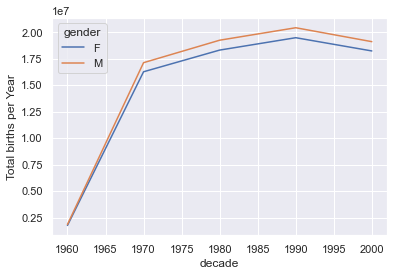

In [59]:
birth_decade = df.pivot_table("births", index="decade", columns="gender", aggfunc="sum")
birth_decade.plot()
plt.ylabel("Total births per Year")
plt.show()

We must start by cleaning the data a bit, removing outliers caused by mistyped dates or missing values. One easy way to remove these all at once is to cut outliers, we’ll do this via a robust sigma-clipping operation:

In [60]:
import numpy as np
quartiles = np.percentile(df["births"], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution. With this we can use the query() method to filter out rows with births outside these values:

In [63]:
df = df.query("(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)")
df.index = pd.to_datetime(10000 * df.year + 100 * df.month + df.day, format="%Y%m%d")
df["dayofweek"] = df.index.dayofweek
df.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_8836\1597314607.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(["Mon", "Tues", "Wed", "Thur", "Fri", "Sat", "Sun"])


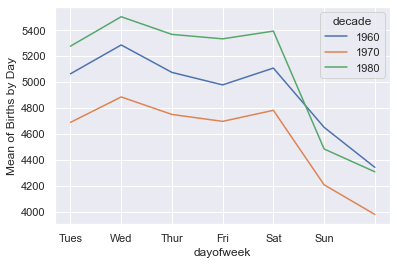

In [66]:
df.pivot_table("births", index="dayofweek", columns="decade", aggfunc="mean").plot()
plt.gca().set_xticklabels(["Mon", "Tues", "Wed", "Thur", "Fri", "Sat", "Sun"])
plt.ylabel("Mean of Births by Day")
plt.show()

group the data by month and day separately

In [67]:
births_mont = df.pivot_table("births", [df.index.month, df.index.day])
births_mont.head()


births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [68]:
births_mont.index = [pd.datetime(2012, month, day) for (month, day) in births_mont.index]
births_mont.head()

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_8836\2091003726.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_mont.index = [pd.datetime(2012, month, day) for (month, day) in births_mont.index]


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


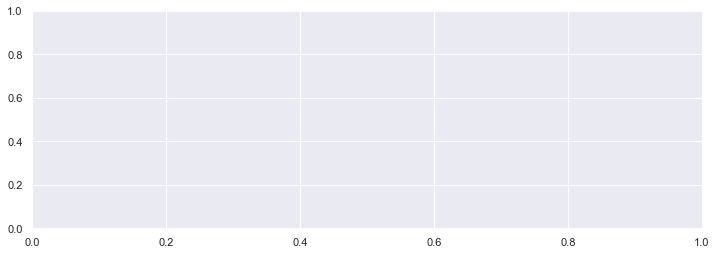

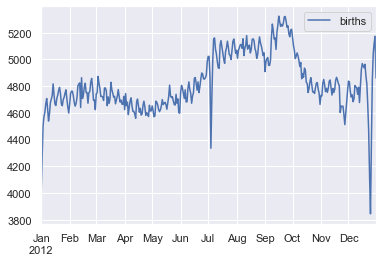

In [71]:
fig, ax = plt.subplots(figsize = (12,4))
births_mont.plot()
plt.show()